# Case 2 - Unsupervised Learning
Welcome to the demonstration notebook where we'll go over all of the Unsupervised learning functions in the **pylenm** package!<br>
Let’s get started!


## Setup
Make sure to install pylenm from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [1]:
# pip install pylenm

In [2]:
# Import our packages
# Import our packages
import logging
import pylenm2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm2_dm.__version__`

In [3]:
pylenm2.__version__

'2.7.1'

In [4]:
# url_1 = 'https://raw.githubusercontent.com/ALTEMIS-DOE/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
# url_2 = 'https://github.com/ALTEMIS-DOE/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
# concentration_data = pd.read_csv(url_1)
# construction_data = pd.read_excel(url_2)

# url_1 = './data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
# url_2 = './data/FASB Well Construction Info.xlsx'

url_1 = "https://raw.githubusercontent.com/ALTEMIS-DOE/pylenm/refs/heads/satyarth/notebooks2/data/FASB_Data_thru_3Q2015_Reduced_Demo_general.csv"
url_2 = "https://github.com/ALTEMIS-DOE/pylenm/raw/refs/heads/satyarth/notebooks2/data/FASB_Well_Construction_Info_general.xlsx?raw=true"

concentration_data = pd.read_csv(url_1, dtype={15: str, 22: str, 23: str})
construction_data = pd.read_excel(url_2, engine='openpyxl')    # for .xlsx files

In [5]:
# Create instance
# pylenm_df = PylenmDataFactory(concentration_data) # Save concentration data
# pylenm_df.simplify_data(inplace=True)
# pylenm_df.setConstructionData(construction_data) # Save construction data

from pylenm2 import PylenmDataModule

pylenm2_dm = PylenmDataModule(
    data=concentration_data,
    construction_data=construction_data,
    logger_level=logging.INFO,
)

from pylenm2.data import filters
filters.simplify_data(data=pylenm2_dm, inplace=True)

2024-11-04 18:34:07,654 [INFO] data_module.py: line 137: Successfully imported the data!
Successfully imported the data!

2024-11-04 18:34:07,661 [INFO] data_module.py: line 167: Successfully imported the construction data!
Successfully imported the construction data!

2024-11-04 18:34:08,074 [INFO] data_module.py: line 137: Successfully imported the data!


COLLECTION_DATE STATION_ID          ANALYTE_NAME  RESULT RESULT_UNITS  \
0          1990-01-01     FSB 77                    PH    3.30           pH   
1          1990-01-01    FSB105C        DEPTH_TO_WATER   80.49           ft   
2          1990-01-01    FSB107D  SPECIFIC CONDUCTANCE  289.00        uS/cm   
3          1990-01-01    FSB101A        DEPTH_TO_WATER  134.49           ft   
4          1990-01-01    FSB101A  SPECIFIC CONDUCTANCE  161.00        uS/cm   
...               ...        ...                   ...     ...          ...   
86206      2015-09-24    FBI 15D        DEPTH_TO_WATER   15.40           ft   
86207      2015-09-24    FSB127D        DEPTH_TO_WATER   18.20           ft   
86208      2015-09-24    FSB113C        DEPTH_TO_WATER   23.20           ft   
86209      2015-09-24    FOB 13D        DEPTH_TO_WATER   21.50           ft   
86210      2015-09-24     FSB 79        DEPTH_TO_WATER   19.76           ft   

      COLLECTION_TIME  
0               00:00  
1               00:00  
2               00:00  
3               00:00  
4               00:00  
...               ...  
86206           00:00  
86207           00:00  
86208           00:00  
86209           00:00  
86210           00:00  

[86211 rows x 6 columns]

## Functions

 The `getCleanData()` function is a useful preprocessing tool for restructuring the original concentration dataset into a more suitable structure for analysis.
 <br>Let's take a closer look at the function:

In [6]:
from pylenm2.data import fetchers

# We'll save a list of the analytes we want to look at and pass it to the functions below
# analytes = ['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
analytes = ['TRITIUM','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
# pylenm_df.getCleanData(analytes)
fetchers.getCleanData(
    data_pylenm_dm=pylenm2_dm,
    analytes=analytes,
)

ANALYTE_NAME    DEPTH_TO_WATER                                               \
STATION_ID             FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8 FOB  1D   
COLLECTION_DATE                                                               
1990-01-01                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-02                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-03                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-06                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-07                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
...                        ...     ...     ...    ...    ...    ...     ...   
2015-09-10                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-21                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-22                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-23                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-24                17.4    15.4   25.16    NaN    NaN    NaN     NaN   

ANALYTE_NAME                             ... URANIUM-238                  \
STATION_ID      FOB  2C FOB  2D FOB 13D  ...     FSP  2B FSP  2C FSP 47A   
COLLECTION_DATE                          ...                               
1990-01-01          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN  ...         NaN     NaN     NaN   
...                 ...     ...     ...  ...         ...     ...     ...   
2015-09-10          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-23          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-24          NaN     NaN    21.5  ...         NaN     NaN     NaN   

ANALYTE_NAME                                                               
STATION_ID      FSP-072A FSP-072B FSP-12A FSP204A FSP226A FSP249A FSP249B  
COLLECTION_DATE                                                            
1990-01-01           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-02           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-03           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-06           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-07           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
...                  ...      ...     ...     ...     ...     ...     ...  
2015-09-10           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-21           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-22           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-23           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-24           NaN      NaN     NaN     NaN     NaN     NaN     NaN  

[2421 rows x 773 columns]

As you can see above, there are many missing values (NaN), but thats normal since there isn't always a concentration value for each analyte, well and date 3-tuple.

The next function is called `getCommonDates()` and this is used to get insight on how many data points exist for a given range of days.
<br>Lets see an example and a plot to show how much more data can be extracted from the dataset using a lag.

In [7]:
lags = [1,3,7,12]
shared_dates = fetchers.getCommonDates(
    data_pylenm_dm=pylenm2_dm,
    analytes=analytes, 
    lag=lags,
)
shared_dates

Date Ranges Number of stations
Dates      Lag                                            
1990-01-01 1    1989-12-31 - 1990-01-02                 16
           3    1989-12-29 - 1990-01-04                 24
           7    1989-12-25 - 1990-01-08                 41
           12   1989-12-20 - 1990-01-13                 53
1990-01-02 1    1990-01-01 - 1990-01-03                 14
...                                 ...                ...
2015-09-23 12   2015-09-11 - 2015-10-05                 15
2015-09-24 1    2015-09-23 - 2015-09-25                  8
           3    2015-09-21 - 2015-09-27                 14
           7    2015-09-17 - 2015-10-01                 15
           12   2015-09-12 - 2015-10-06                 15

[9684 rows x 2 columns]

Let's create a plot to examine the differences in number of well data available as we increase the lag.

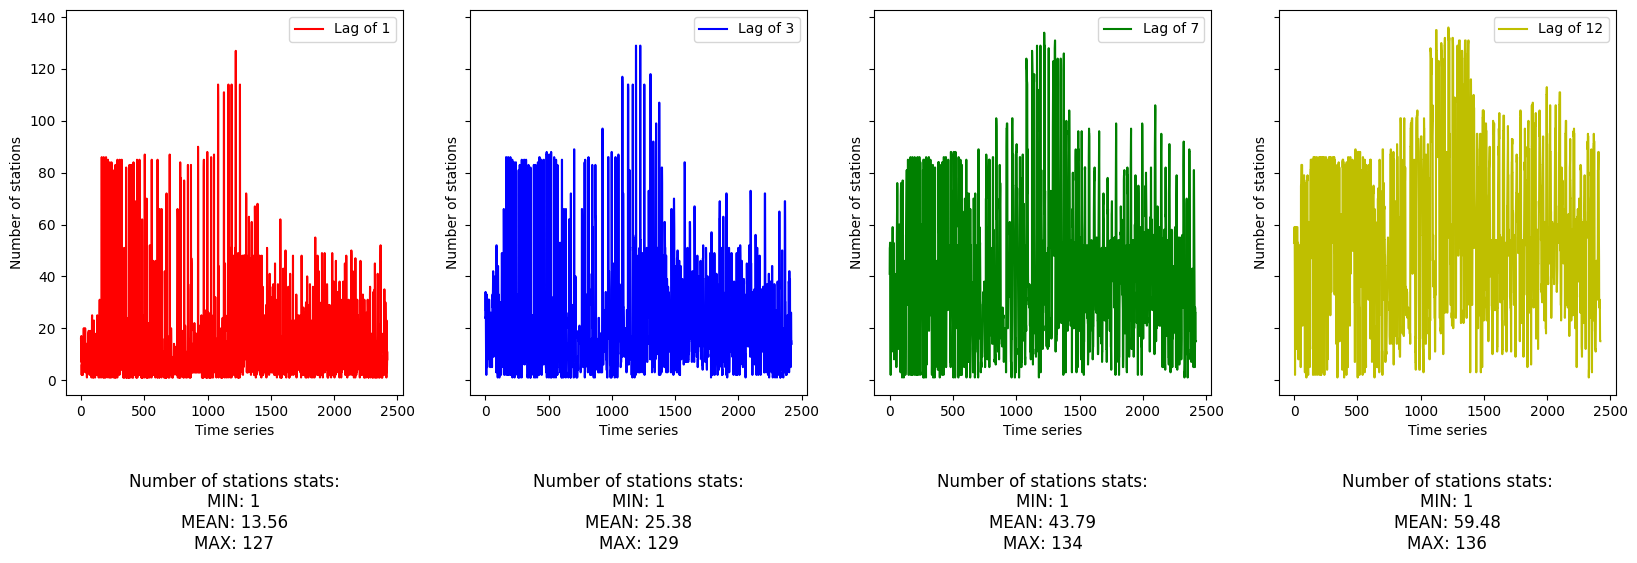

In [8]:
colors = ['r', 'b', 'g', 'y']

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5), sharex=True, sharey=True)

for i, ax in enumerate(axs):
    data = np.array(shared_dates[shared_dates.index.get_level_values('Lag')==lags[i]]['Number of stations'])
    
    axs[i].plot(data, color=colors[i], label='Lag of '+str(lags[i]))
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel('Time series')
    axs[i].set_ylabel('Number of stations')
    stats_text = str('Number of stations stats:\nMIN: {}\nMEAN: {}\nMAX: {}'.format(data.min(), round(data.mean(), 2), data.max()))
    axs[i].text(0.5,-0.4, stats_text, size=12, ha="center", transform=axs[i].transAxes)

As we can see, the average number of wells increases significantly as we increase the lag.
<br> With this insight, we can make a determination as to which lag is most suitable for our data. For the purpose of this demonstration we will continue the rest of the examples with a lag of 12.
<br><br> `getJointData()` takes `getCleanData()` one step further and saves the data according to the specified lag. You’ll notice that the index is no long a single date but a range of dates. The new range is (date - lag) through (date + lag).

In [9]:
lag = 12
jointData = fetchers.getJointData(
    data_pylenm_dm=pylenm2_dm, 
    analytes=analytes, 
    lag=lag,
)
jointData

GENERATING DATA WITH A LAG OF 12 DAYS.


Progress: 100%|██████████| 2421/2421 [03:08<00:00, 12.82it/s]


Completed


ANALYTE_NAME            DEPTH_TO_WATER                                       \
STATION_ID                     FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8   
1989-12-20 - 1990-01-13            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-21 - 1990-01-14            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-22 - 1990-01-15            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-25 - 1990-01-18            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-26 - 1990-01-19            NaN     NaN     NaN    NaN    NaN    NaN   
...                                ...     ...     ...    ...    ...    ...   
2015-08-29 - 2015-09-22            NaN     NaN     NaN    NaN    NaN    NaN   
2015-09-09 - 2015-10-03           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-10 - 2015-10-04           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-11 - 2015-10-05           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-12 - 2015-10-06           17.4    15.4   25.16    NaN    NaN    NaN   

ANALYTE_NAME                                             ... URANIUM-238  \
STATION_ID              FOB  1D FOB  2C FOB  2D FOB 13D  ...     FSP  2B   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN  ...         NaN   
...                         ...     ...     ...     ...  ...         ...   
2015-08-29 - 2015-09-22     NaN     NaN     NaN     NaN  ...       0.237   
2015-09-09 - 2015-10-03     NaN     NaN     NaN    21.5  ...         NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN    21.5  ...         NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN    21.5  ...         NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN    21.5  ...         NaN   

ANALYTE_NAME                                                               \
STATION_ID              FSP  2C FSP 47A FSP-072A FSP-072B FSP-12A FSP204A   
1989-12-20 - 1990-01-13     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN      NaN      NaN     NaN     NaN   
...                         ...     ...      ...      ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     NaN    0.104   0.0457    1.02   0.479   
2015-09-09 - 2015-10-03     NaN     NaN      NaN      NaN     NaN     NaN   
2015-09-10 - 2015-10-04     NaN     NaN      NaN      NaN     NaN     NaN   
2015-09-11 - 2015-10-05     NaN     NaN      NaN      NaN     NaN     NaN   
2015-09-12 - 2015-10-06     NaN     NaN      NaN      NaN     NaN     NaN   

ANALYTE_NAME                                     
STATION_ID              FSP226A FSP249A FSP249B  
1989-12-20 - 1990-01-13     NaN     NaN     NaN  
1989-12-21 - 1990-01-14     NaN     NaN     NaN  
1989-12-22 - 1990-01-15     NaN     NaN     NaN  
1989-12-25 - 1990-01-18     NaN     NaN     NaN  
1989-12-26 - 1990-01-19     NaN     NaN     NaN  
...                         ...     ...     ...  
2015-08-29 - 2015-09-22     NaN   0.287   0.169  
2015-09-09 - 2015-10-03     NaN     NaN     NaN  
2015-09-10 - 2015-10-04     NaN     NaN     NaN  
2015-09-11 - 2015-10-05     NaN     NaN     NaN  
2015-09-12 - 2015-10-06     NaN     NaN     NaN  

[2421 rows x 773 columns]

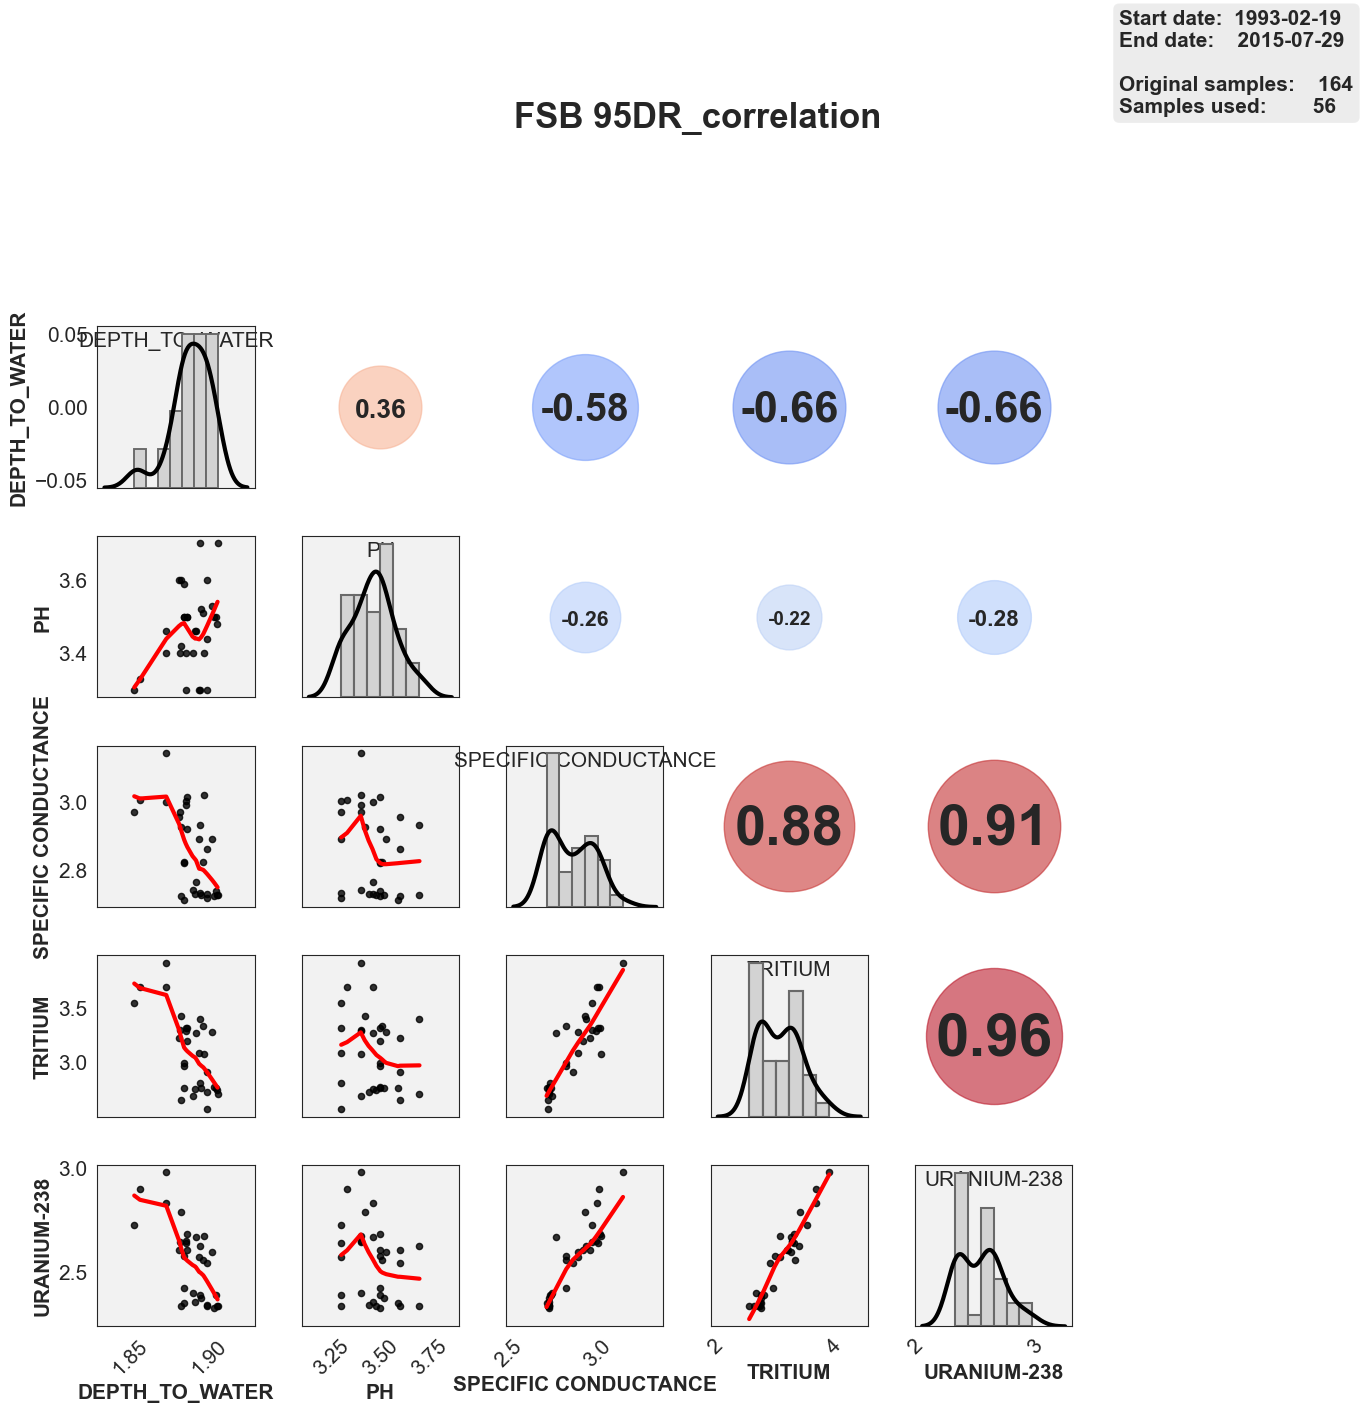

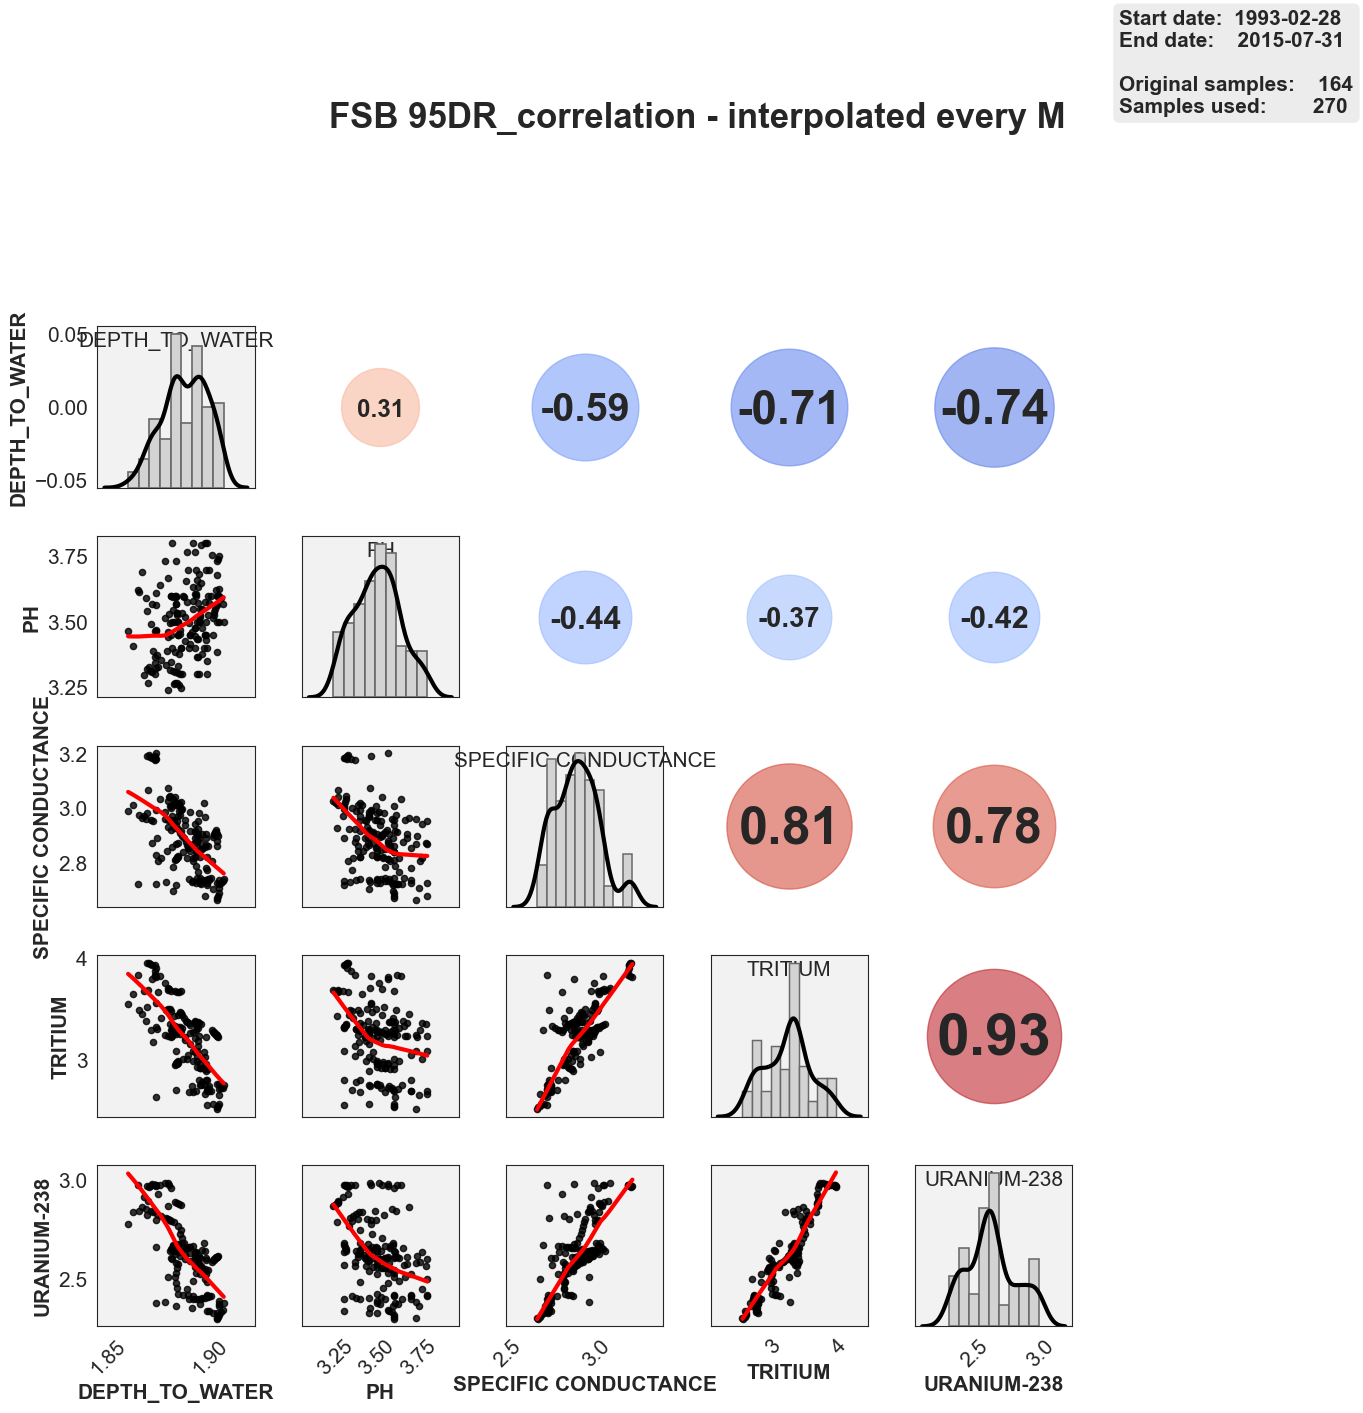

In [10]:
# NOTE: Start date, End date, and Samples used are different compared to the original notebook.
# TODO: Check with @Zexuan

# analytes = ['TRITIUM','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']

from pylenm2.stats import preprocess
from pylenm2.visualization import plots
from pylenm2.visualization import correlation as pcorr


_ = pcorr.plot_corr_by_station(
    data_pylenm_dm=pylenm2_dm,
    station_name='FSB 95DR', 
    analytes=analytes, 
    log_transform=True, 
    remove_outliers=True, 
    z_threshold=1.3, 
    remove=['1999-07-28'], 
    no_log=['PH'],
    fontsize=15,
)


_ = pcorr.plot_corr_by_station(
    data_pylenm_dm=pylenm2_dm,
    station_name='FSB 95DR', 
    analytes=analytes, 
    interpolate=True, 
    frequency='M', 
    remove_outliers=True, 
    z_threshold=1.3, 
    log_transform=True, 
    remove=['1999-07-28'], 
    no_log=['PH'],
    fontsize=15,
)

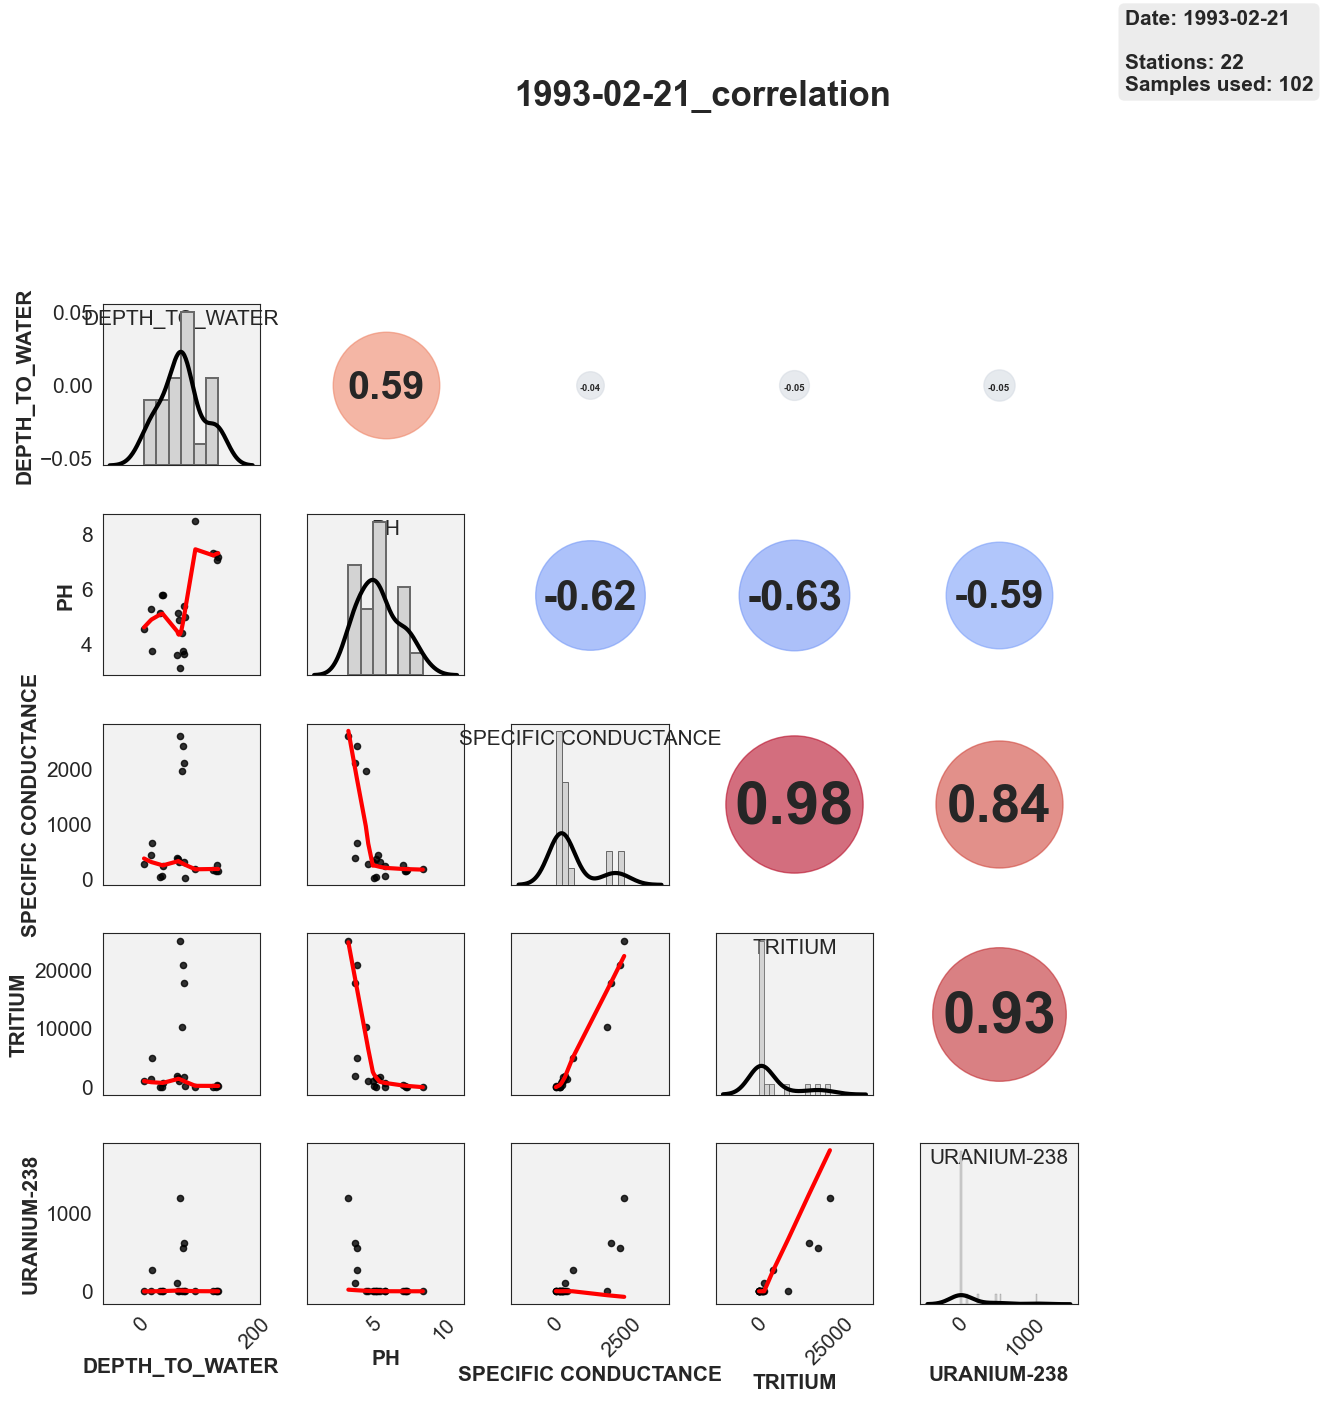

In [11]:
# pylenm_df.plot_corr_by_date_range('1993-02-21', analytes=analytes, returnData=True)
_ = pcorr.plot_corr_by_date_range(
    data_pylenm_dm=pylenm2_dm,
    date='1993-02-21', 
    analytes=analytes, 
    # returnData=True,
    fontsize=15,
)

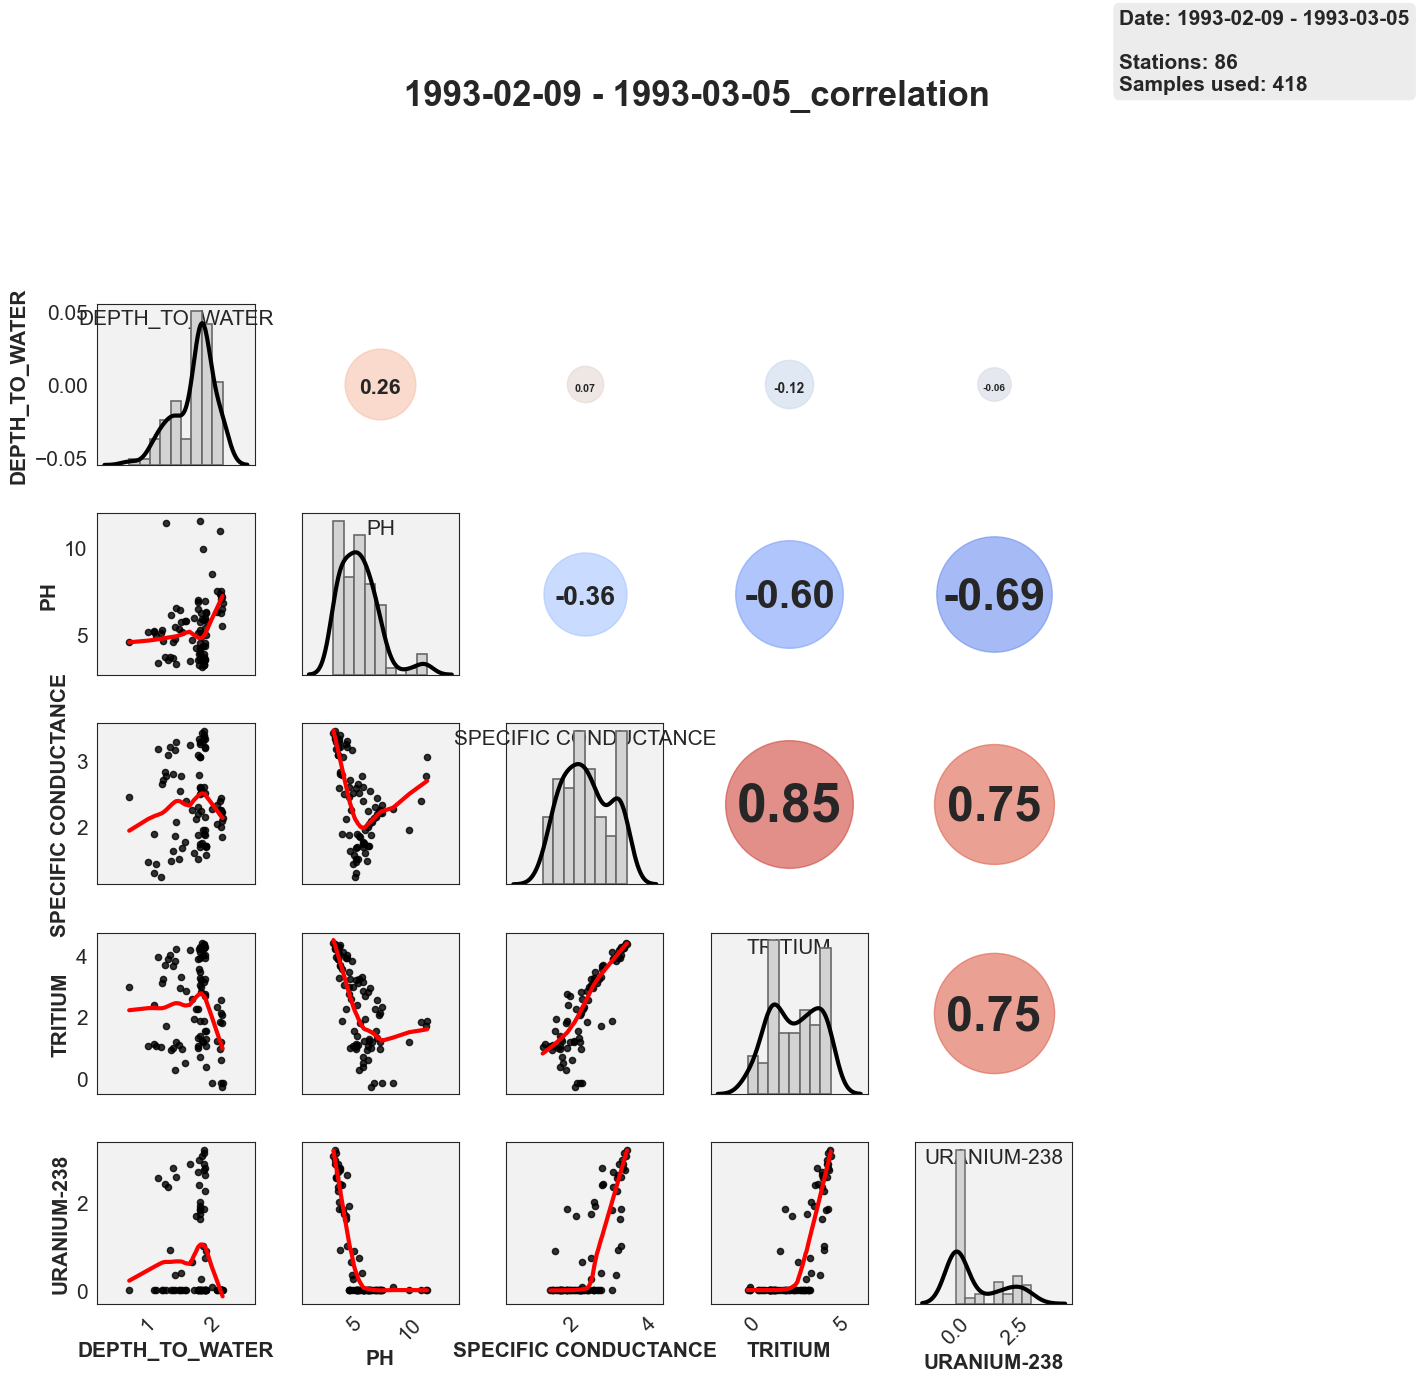

In [12]:
from pylenm2.data import data_module

_ = pcorr.plot_corr_by_date_range(
    data_pylenm_dm=pylenm2_dm,
    date='1993-02-21', 
    lag=lag, 
    analytes=analytes, 
    log_transform=True, 
    no_log=['PH'],
    fontsize=15,
)

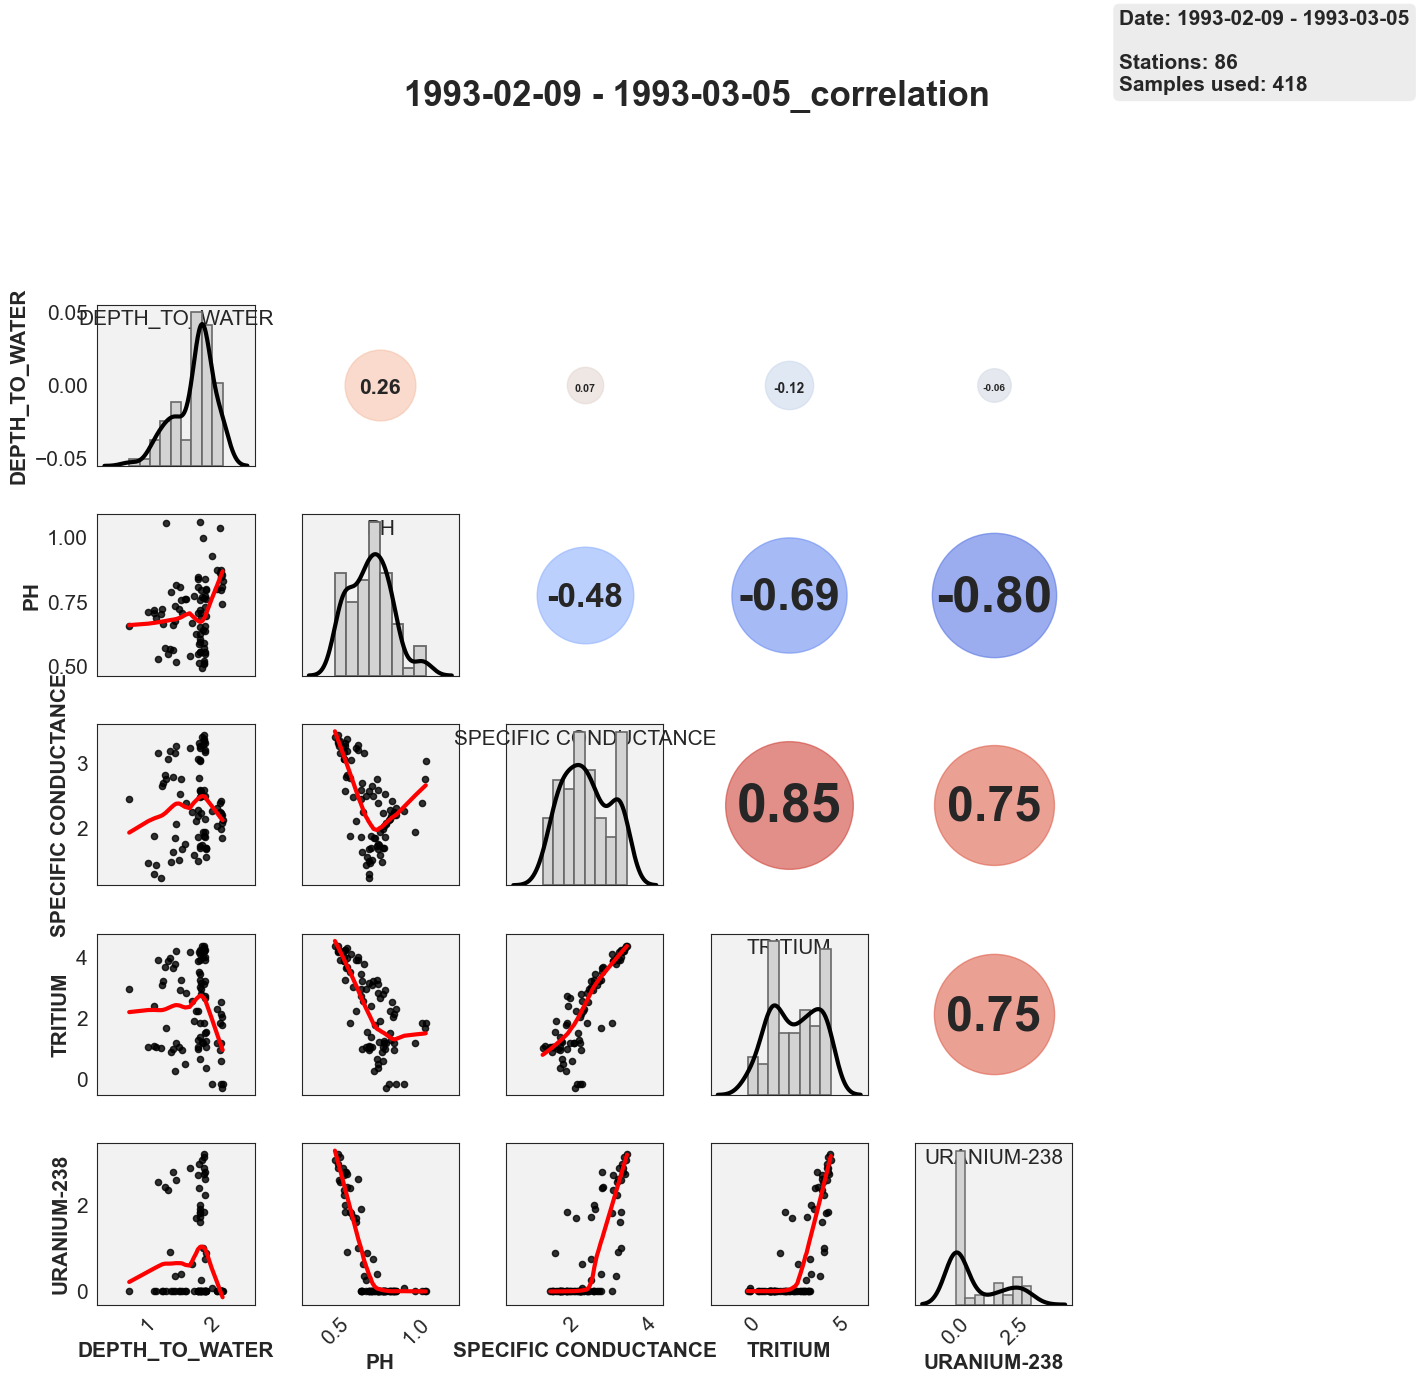

In [13]:
_ = pcorr.plot_corr_by_date_range(
    data_pylenm_dm=pylenm2_dm,
    date='1993-02-21', 
    lag=lag, 
    analytes=analytes, 
    log_transform=True,
    fontsize=15,
)

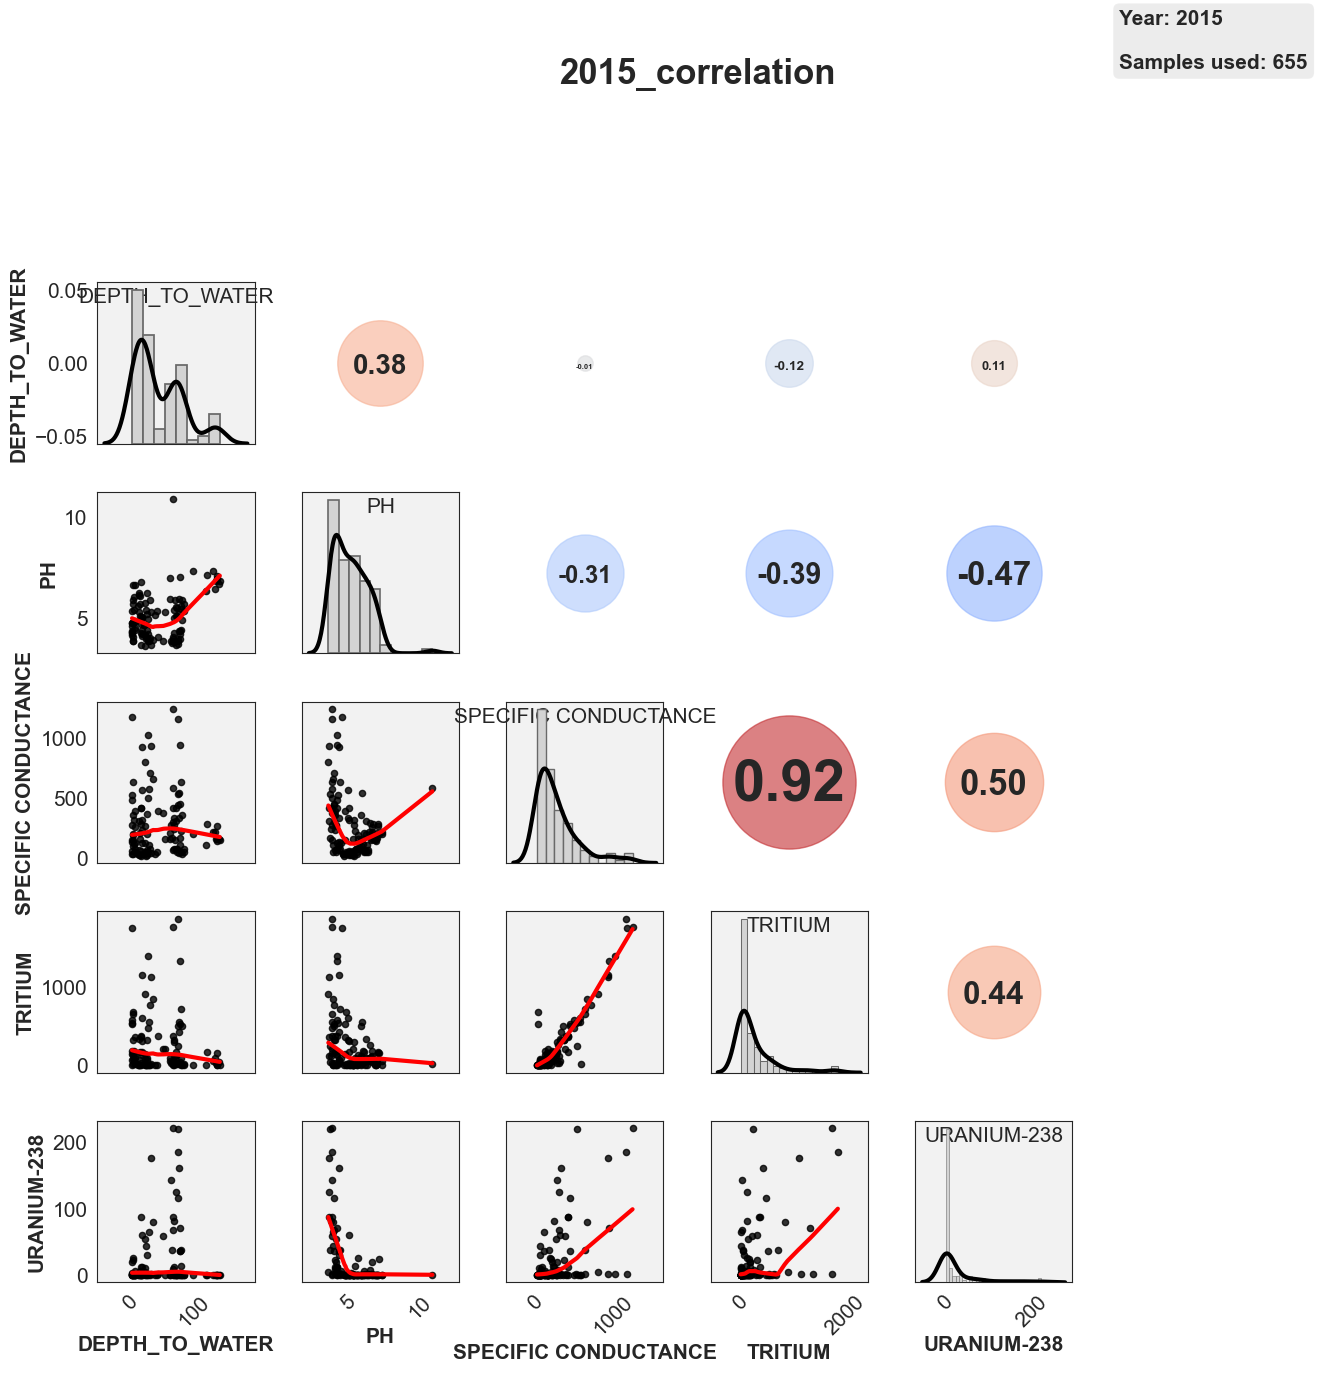

In [14]:
import importlib
importlib.reload(pcorr)

_ = pcorr.plot_corr_by_year(
    data_pylenm_dm=pylenm2_dm,
    year=2015, 
    analytes=analytes, 
    remove_outliers=True, 
    z_threshold=5, 
    no_log=['PH'],
    fontsize=15,
)

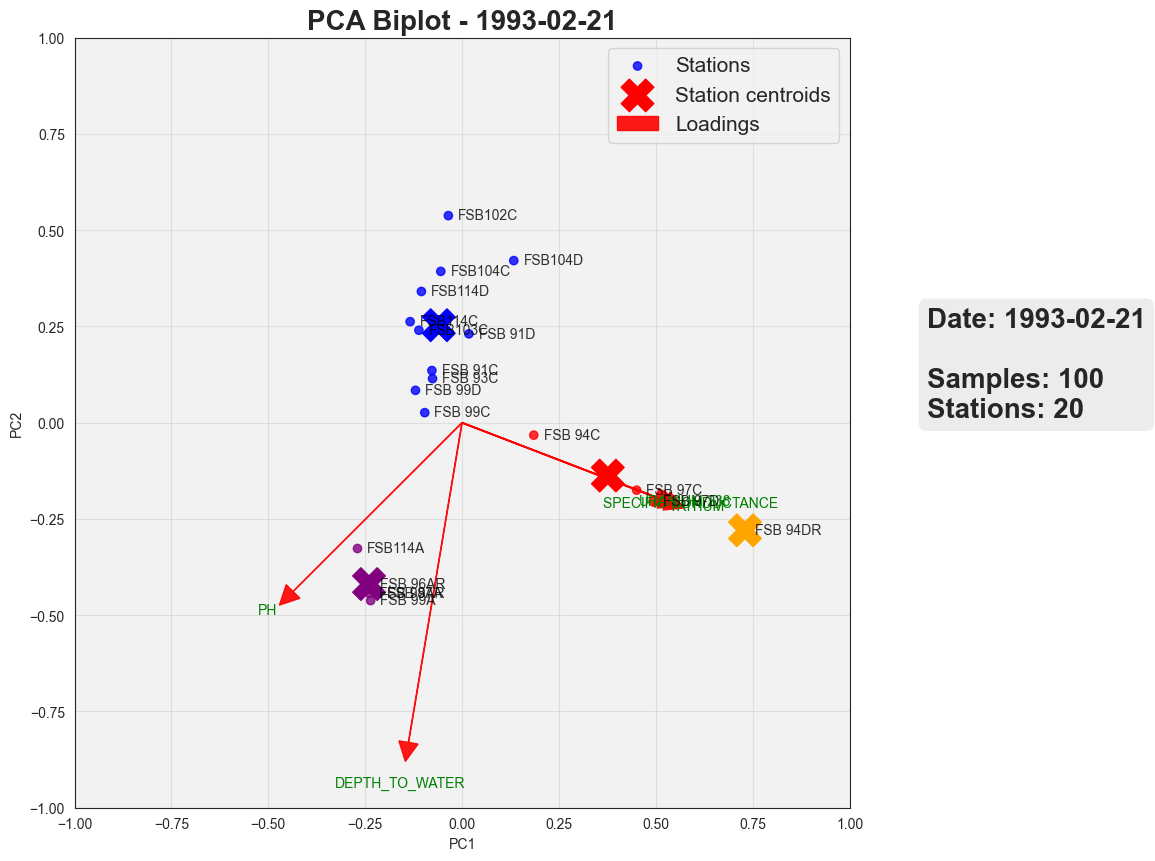

In [15]:
from pylenm2.visualization import pca as ppca

# pylenm_df.plot_PCA_by_date('1993-02-21', analytes)
ppca.plot_PCA_by_date(
    data_pylenm_dm=pylenm2_dm, 
    date='1993-02-21', 
    analytes=analytes,
)

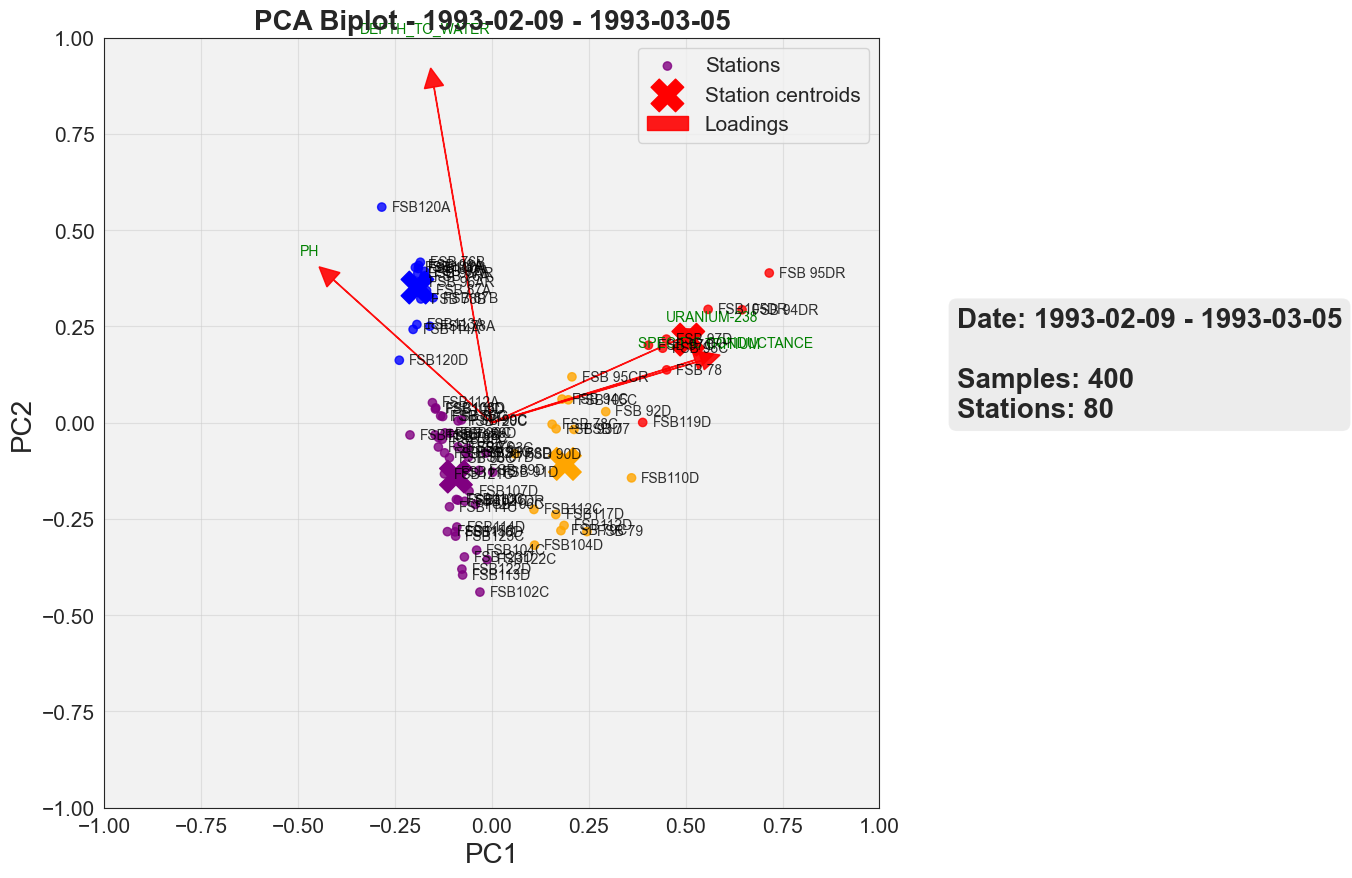

In [16]:
# pylenm_df.plot_PCA_by_date('1993-02-21', analytes, lag=lag)
ppca.plot_PCA_by_date(
    data_pylenm_dm=pylenm2_dm,
    date='1993-02-21', 
    analytes=analytes, 
    lag=lag,
)

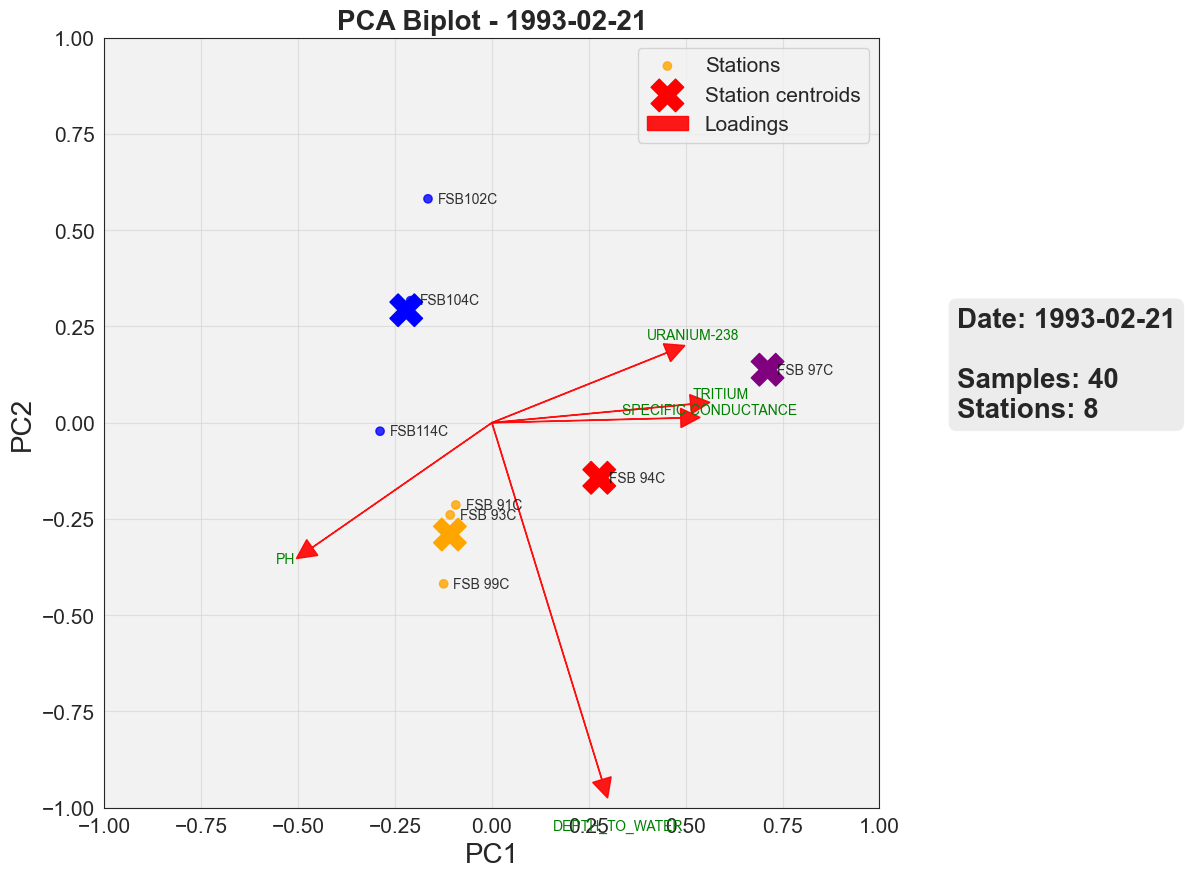

In [17]:
#  pylenm_df.plot_PCA_by_date('1993-02-21', analytes, lag=0, filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])
ppca.plot_PCA_by_date(
    data_pylenm_dm=pylenm2_dm,
    date='1993-02-21', 
    analytes=analytes, 
    lag=0, 
    filter=True, 
    col='AQUIFER', 
    equals=['LAZ_UTRAU'],
)

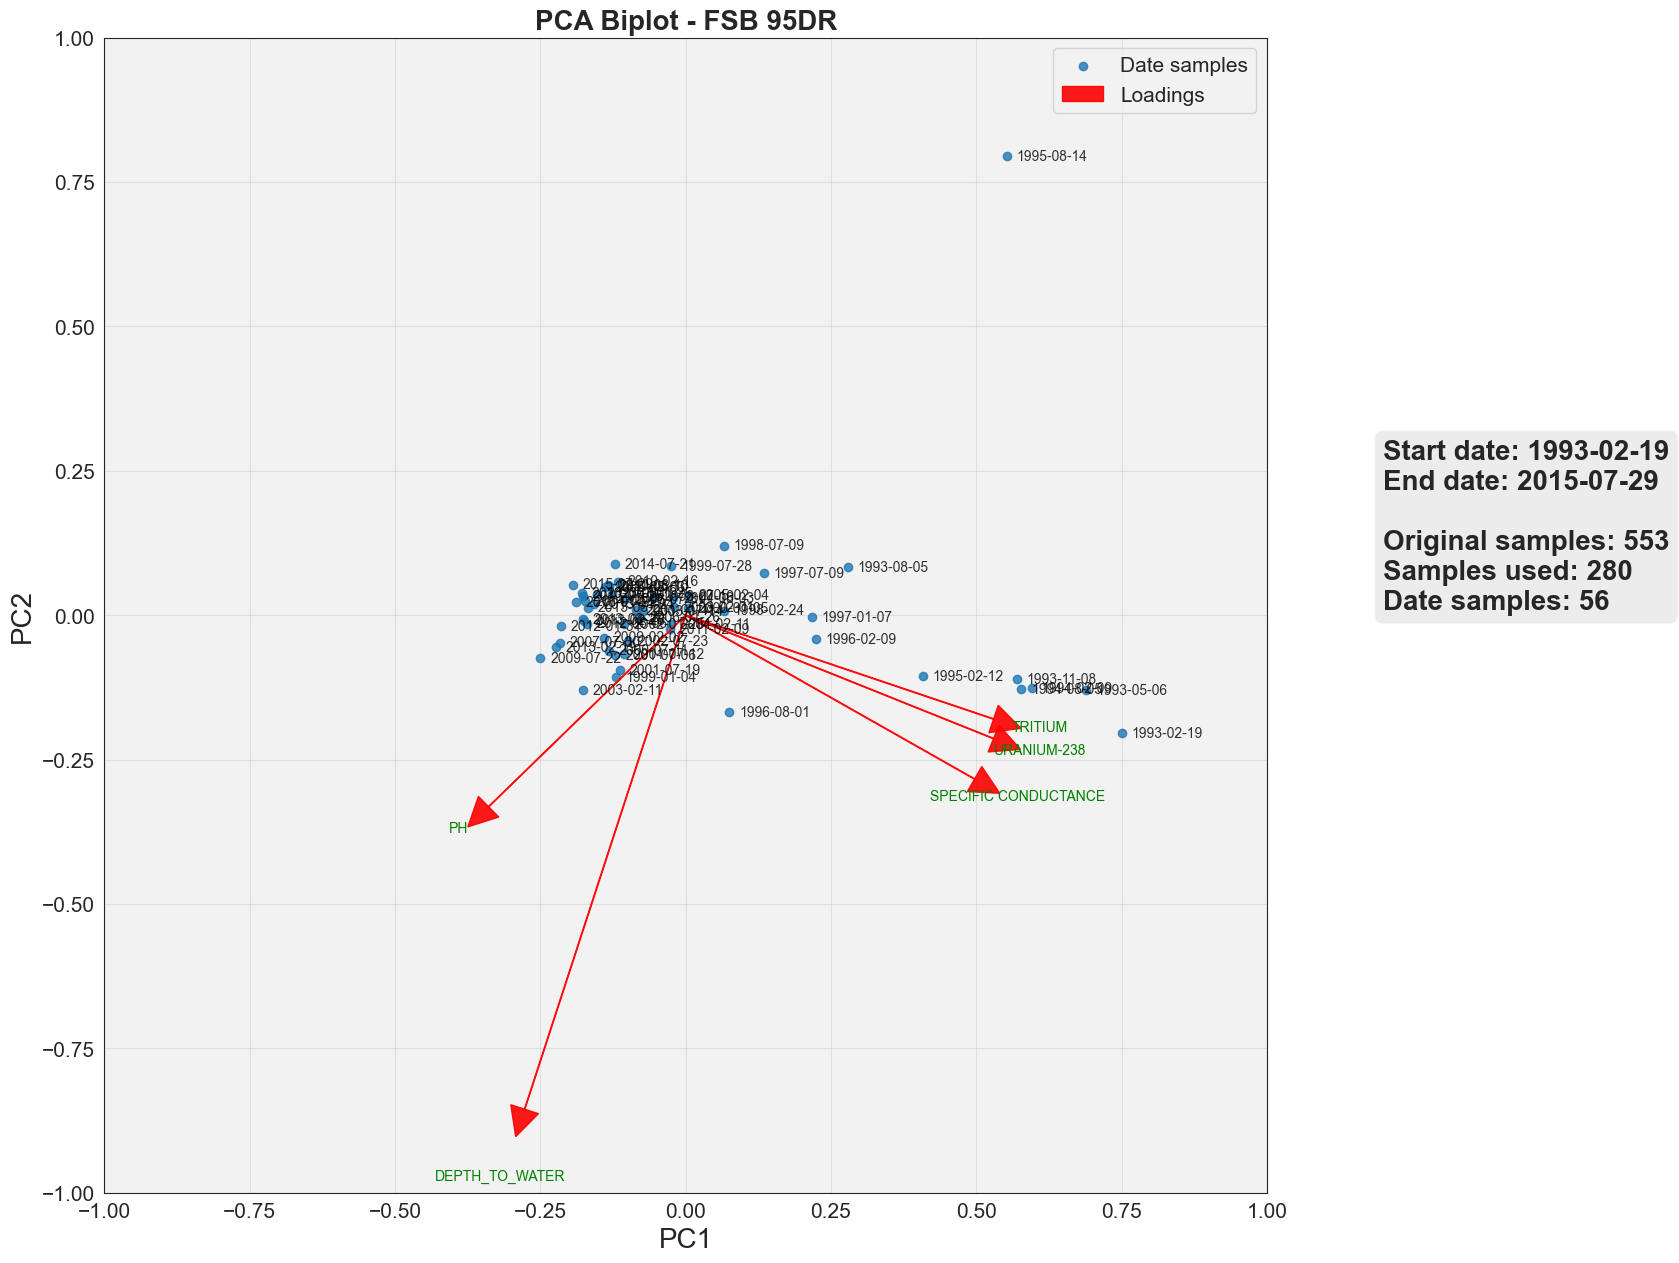

In [18]:
# pylenm_df.plot_PCA_by_well(well_name='FSB 95DR', analytes=analytes)
ppca.plot_PCA_by_station(
    data_pylenm_dm=pylenm2_dm,
    station_name='FSB 95DR', 
    analytes=analytes,
)

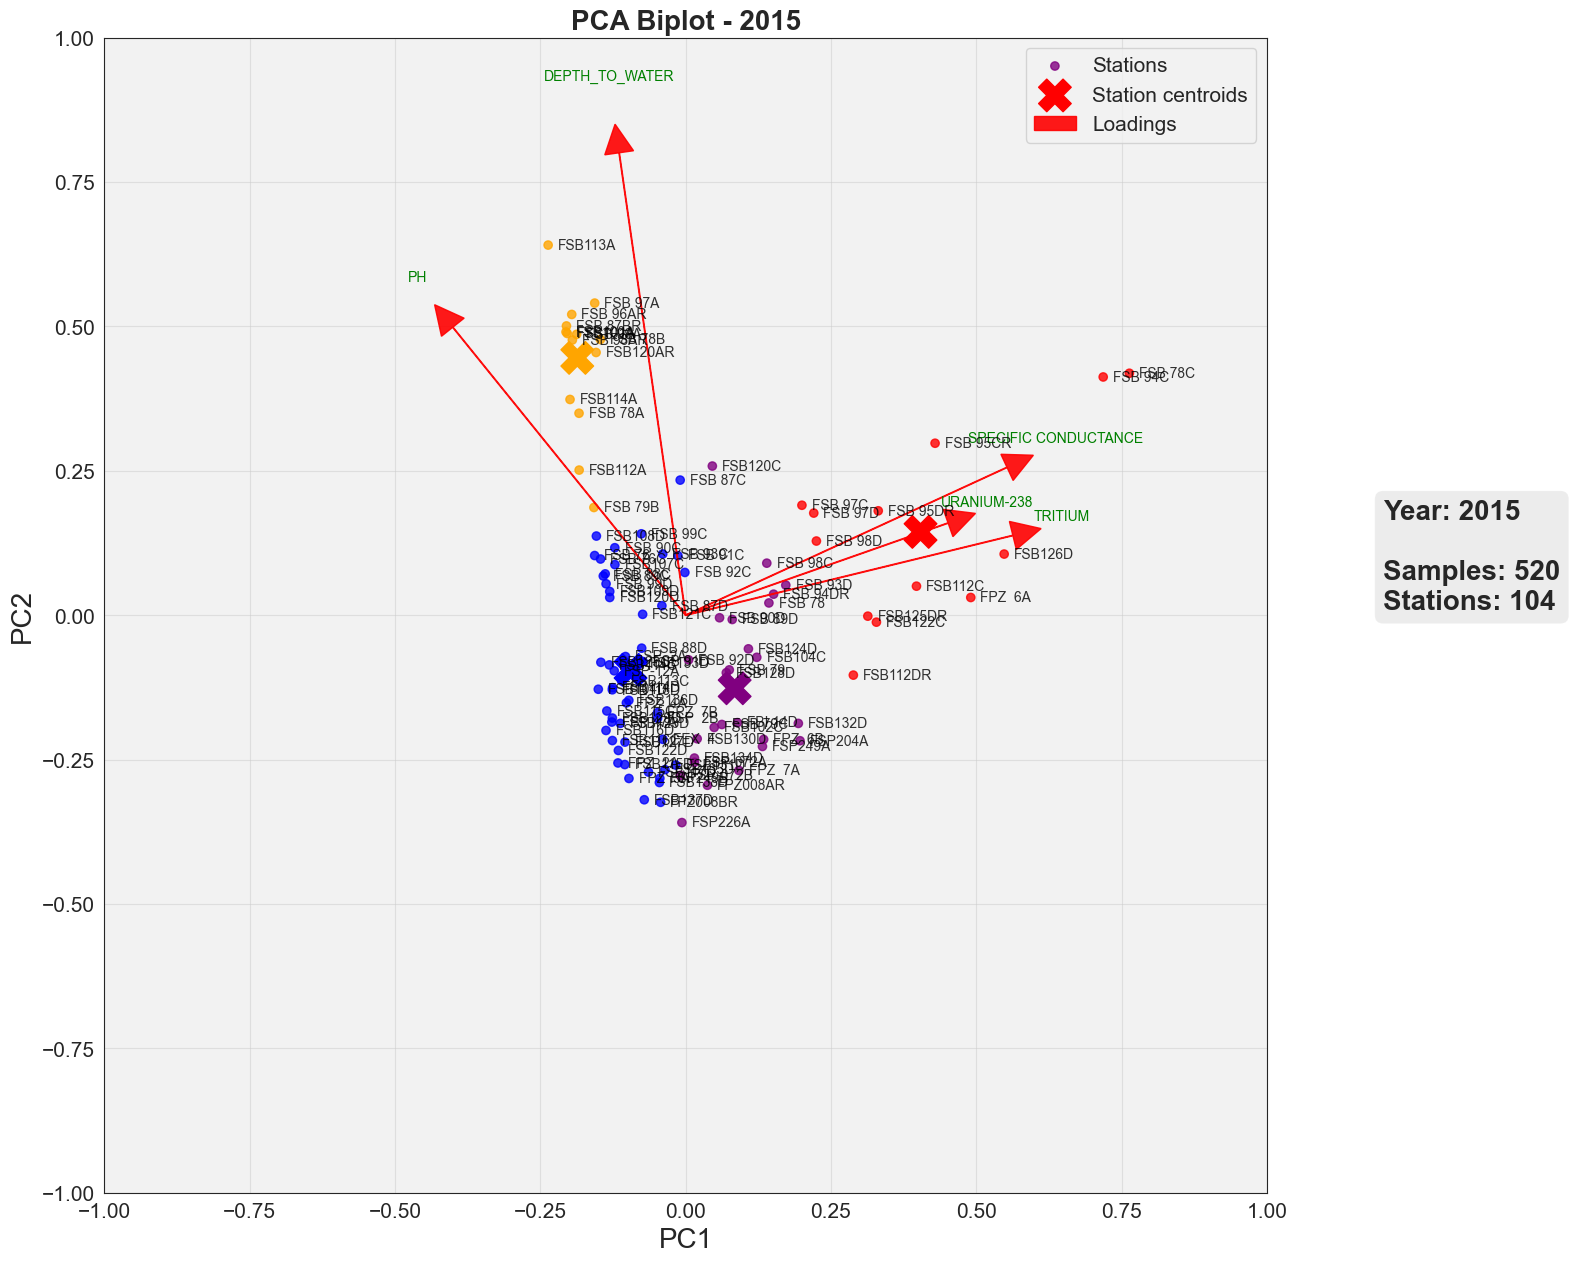

In [19]:
# pylenm_df.plot_PCA_by_year(2015, analytes=analytes)
ppca.plot_PCA_by_year(
    data_pylenm_dm=pylenm2_dm,
    year=2015, 
    analytes=analytes,
)

## Clustering

In [20]:
# NOTE: `tritium` DataFrame dimensions are different compared to the original notebook.
# TODO: Check with @Zexuan


from pylenm2.data import transformation

tritium = transformation.interpolate_stations_by_analyte(
    data_pylenm_dm=pylenm2_dm,
    analyte='TRITIUM', 
    frequency='2W',
    z_threshold=1.5,
)
tritium = np.log10(tritium)
tritium = tritium.dropna(axis=1)
tritium

/opt/anaconda3/envs/pylenm_env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


FAS-091   FAS-092   FSB113A   FSB113C   FSB113D   FSB114C  \
COLLECTION_DATE                                                               
1990-01-07       2.442788  2.594692  1.907699  2.095632  2.350413  0.693130   
1990-01-21       2.442788  2.594692  1.907699  2.095632  2.350413  0.693130   
1990-02-04       2.442788  2.594692  1.907699  2.095632  2.350413  0.693130   
1990-02-18       2.442788  2.594692  1.907699  2.095632  2.350413  0.693130   
1990-03-04       2.442788  2.594692  1.907699  2.095632  2.350413  0.693130   
...                   ...       ...       ...       ...       ...       ...   
2015-08-02       2.294466  2.452886  1.409933  1.878522  2.305351  0.079181   
2015-08-16       2.294466  2.452553  1.409933  1.878522  2.305351  0.079181   
2015-08-30       2.442788  2.594692  1.907699  2.095632  2.350413  0.693130   
2015-09-13       2.294466  2.452153  1.409933  1.878522  2.305351  0.079181   
2015-09-27       2.294466  2.451853  1.409933  1.878522  2.305351  0.079181   

                  FSB114D   FSB115C   FSB115D   FSB116C  ...   FSB 88C  \
COLLECTION_DATE                                          ...             
1990-01-07       0.611658  0.721541  0.715254  0.830402  ...  2.482857   
1990-01-21       0.611658  0.721541  0.715254  0.830402  ...  1.370328   
1990-02-04       0.611658  0.721541  0.715254  0.830402  ...  1.379590   
1990-02-18       0.611658  0.721541  0.715254  0.830402  ...  2.482857   
1990-03-04       0.611658  0.721541  0.715254  0.830402  ...  2.482857   
...                   ...       ...       ...       ...  ...       ...   
2015-08-02       0.274158  0.338456  0.250420  0.396199  ...  1.502662   
2015-08-16       0.274158  0.338456  0.250420  0.396199  ...  1.502427   
2015-08-30       0.611658  0.721541  0.715254  0.830402  ...  2.482857   
2015-09-13       0.274158  0.338456  0.250420  0.396199  ...  1.502427   
2015-09-27       0.274158  0.338456  0.250420  0.396199  ...  1.502427   

                  FSB 92C   FSB 88D   FSB 89C   FSB 89D   FSB 90C   FSB 90D  \
COLLECTION_DATE                                                               
1990-01-07       2.917820  3.531479  1.929474  2.811091  3.017033  3.769746   
1990-01-21       2.917820  3.516630  1.562293  3.103804  3.003930  3.753548   
1990-02-04       2.917820  3.501255  1.551101  3.106833  2.990420  3.736722   
1990-02-18       2.917820  2.883309  1.929474  2.811091  2.563435  3.214484   
1990-03-04       2.917820  2.883309  1.929474  2.811091  2.563435  3.214484   
...                   ...       ...       ...       ...       ...       ...   
2015-08-02       2.507160  0.759868  1.390963  2.193697  2.037582  1.444839   
2015-08-16       2.514645  0.761928  1.390935  2.201397  2.037426  1.445604   
2015-08-30       2.917820  2.883309  1.929474  2.811091  2.563435  3.214484   
2015-09-13       2.517196  0.761928  1.390935  2.201397  2.037426  1.445604   
2015-09-27       2.517196  0.761928  1.390935  2.201397  2.037426  1.445604   

                  FSB 91C   FSB 91D   FSP249B  
COLLECTION_DATE                                
1990-01-07       3.414973  4.431995  2.668227  
1990-01-21       3.405322  4.410536  2.668227  
1990-02-04       3.395451  4.392571  2.668227  
1990-02-18       2.773150  3.195798  2.668227  
1990-03-04       2.773150  3.195798  2.668227  
...                   ...       ...       ...  
2015-08-02       2.189082  0.455517  2.152161  
2015-08-16       2.186108  0.469822  2.153434  
2015-08-30       2.773150  3.195798  2.668227  
2015-09-13       2.186108  0.469822  2.154914  
2015-09-27       2.186108  0.469822  2.155336  

[672 rows x 154 columns]

In [21]:
# NOTE: "Bad wells" and "Remaining wells" are different compared to the original notebook.
# TODO: Check with @Zexuan


elements = tritium.shape[0]

# rptData = pd.DataFrame(columns=['station_id', 'ratio_repeated'])
rpt_data_list = list()
for station in tritium.columns:
    try:
        occurance = tritium[station].duplicated().value_counts()[True]
    except KeyError:
        occurance = 0
    # rptData = rptData.append({'station_id': station, 'ratio_repeated': occurance/elements}, ignore_index=True)
    rpt_data_list.append({
        'station_id': station, 
        'ratio_repeated': occurance/elements,
    })
rpt_data = pd.DataFrame(rpt_data_list)

std_ratio = rpt_data.describe().T['std'].values[0]
bad_stations = rpt_data[rpt_data["ratio_repeated"] > (1.5 * std_ratio)]
bad_station_names = bad_stations.station_id.to_list()

# print("Bad stations: {}\nRemaining stations: {}".format(len(bad_station_names),elements-len(bad_station_names)))
print(f"Bad stations: {len(bad_station_names)}")
print(f"Remaining stations: {elements-len(bad_station_names)}")

tritium = tritium.drop(bad_station_names, axis=1)

Bad stations: 92
Remaining stations: 580


(672, 62)
(672, 62)


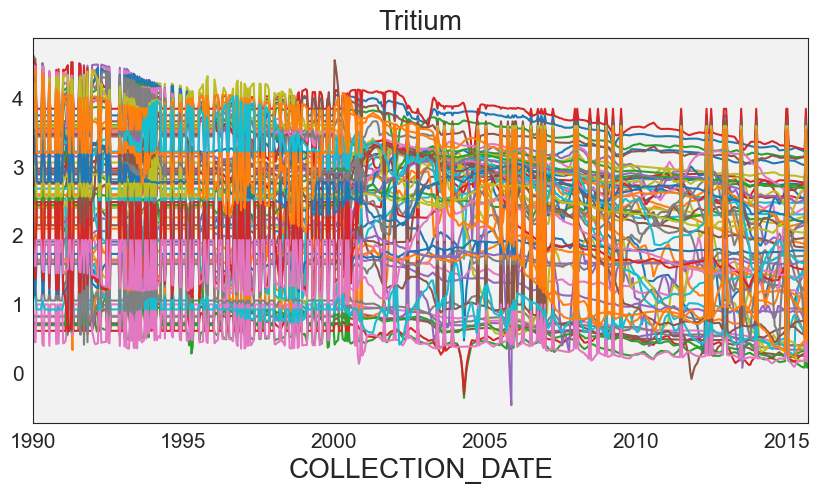

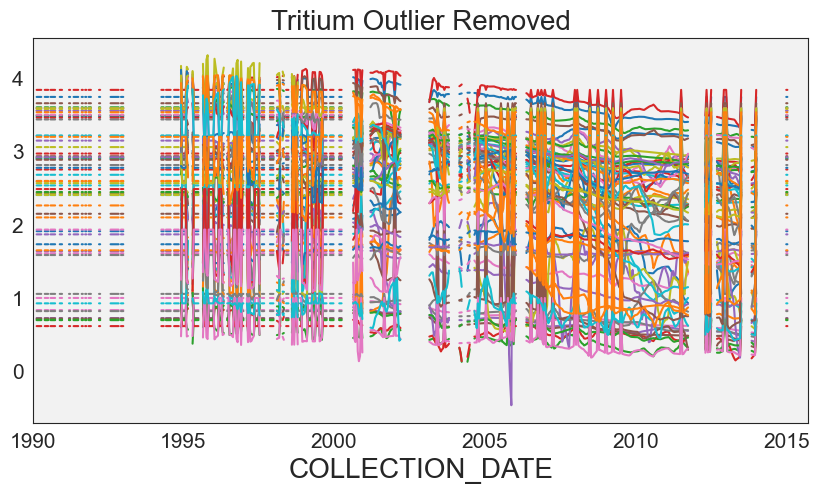

In [33]:
# NOTE: `tritium` and `tritium_rm` dimensions and plots are different compared to the original notebook.
# TODO: Check with @Zexuan


tritium.plot(legend=False, figsize=(10,5), title="Tritium")

# preprocess.remove_outliers(
#     data=tritium, 
#     z_threshold=2.5,
# ).plot(legend=False, figsize=(10,5), title="Tritium Outlier Removed", kind="line")

tritium_rm = preprocess.remove_outliers(
    data=tritium, 
    z_threshold=2.5,
)

tritium_rm.plot(
    legend=False, 
    figsize=(10,5), 
    title="Tritium Outlier Removed", 
)

print(f"{tritium.shape = }")
print(f"{tritium_rm.shape = }")

In [23]:
pylenm2_dm.get_construction_data().head()

FACILITY_ID SITE_GROUP  \
STATION_ID                          
FAI001A            SRS        GSA   
FAI001B            SRS        GSA   
FAI001C            SRS        GSA   
FAI001D            SRS        GSA   
FAI002A            SRS        GSA   

                                                    SITE_NAME  \
STATION_ID                                                      
FAI001A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001B     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001C     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001D     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI002A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

               STATION_TYPE            STATION USE    AQUIFER  \
STATION_ID                                                      
FAI001A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001B     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001C     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001D     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI002A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   

                     STATION_USE   LATITUDE  LONGITUDE     EASTING  ...  \
STATION_ID                                                          ...   
FAI001A     ACTIVE ECO-SENSITIVE  33.273872 -81.622904  441989.564  ...   
FAI001B     ACTIVE ECO-SENSITIVE  33.273873 -81.622891  441990.781  ...   
FAI001C     ACTIVE ECO-SENSITIVE  33.273874 -81.622895  441990.432  ...   
FAI001D     ACTIVE ECO-SENSITIVE  33.273874 -81.622901  441989.928  ...   
FAI002A     ACTIVE ECO-SENSITIVE  33.263961 -81.685462  436156.287  ...   

            SZ_BOT(FT MSL)  GROUND_ELEVATION  REFERENCE_ELEVATION_CODE  \
STATION_ID                                                               
FAI001A             231.30             250.1                         C   
FAI001B             240.60             250.2                         C   
FAI001C             242.68             250.2                         C   
FAI001D             246.75             250.1                         C   
FAI002A             165.88             185.1                         C   

            REFERENCE_ELEVATION TOTAL_DEPTH  CONSTR_OBJ_DIAMETER  \
STATION_ID                                                         
FAI001A                  252.63       19.10                  2.0   
FAI001B                  252.73        9.90                  2.0   
FAI001C                  252.74        7.82                  2.0   
FAI001D                  252.56        3.65                  2.0   
FAI002A                  187.58        3.65                  2.0   

            CONSTR_OBJ_MATERIAL  PUMP_TYPE COMPLETION_DATE DATE_SEALED  
STATION_ID                                                              
FAI001A                     PVC       NONE      2016-03-22         NaT  
FAI001B                     PVC       NONE      2016-03-22         NaT  
FAI001C                     PVC       NONE      2016-03-22         NaT  
FAI001D                     PVC       NONE      2016-03-22         NaT  
FAI002A                     PVC       NONE      2016-03-29         NaT  

[5 rows x 22 columns]

2024-11-04 18:38:28,506 [INFO] cluster.py: line 107: intersect_stations = ['FSB116D', 'FSB 98D', 'FSB 92D', 'FSB 76', 'FSB117D', 'FSB 94DR', 'FSB 97D', 'FSB104D', 'FSB120D', 'FSB 95DR', 'FSB 99D', 'FSB122D', 'FSB 87D', 'FSB 90D', 'FSB 91D', 'FSB108D', 'FSB118D', 'FSB123D', 'FSB 78', 'FSB114D', 'FSB 79', 'FSB 93D', 'FSB109D', 'FSB 88D', 'FSB115D', 'FSB 89D']
2024-11-04 18:38:28,507 [INFO] cluster.py: line 108: len(intersect_stations) = 26


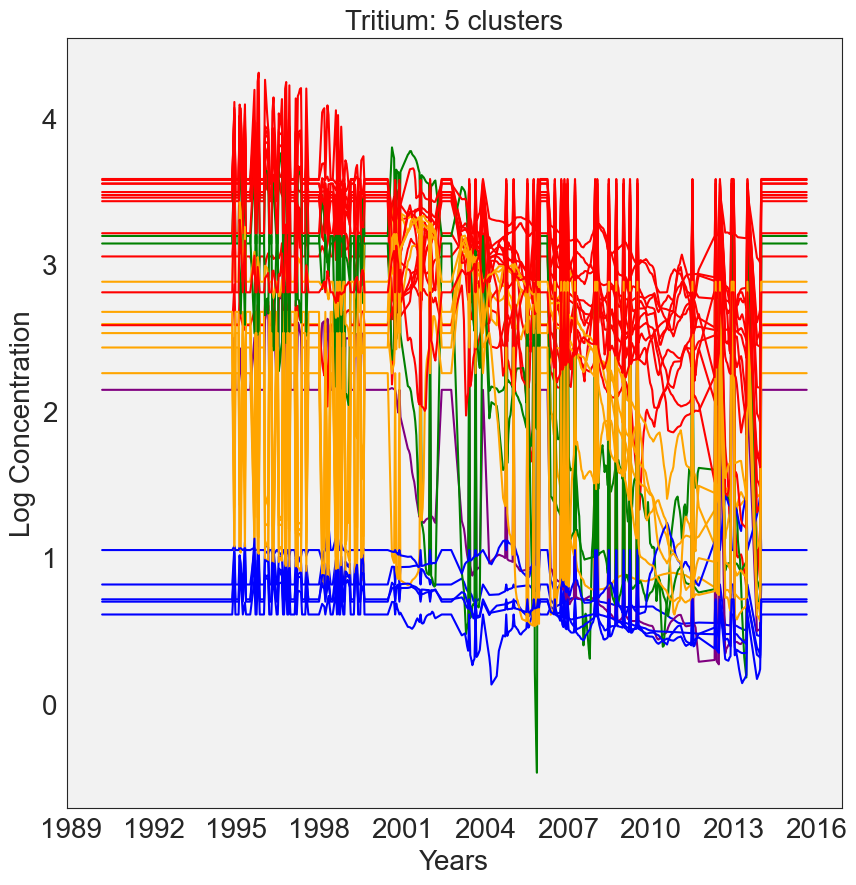

In [24]:
# NOTE: `cluster_data` dimensions and plot are different compared to the original notebook.
# TODO: Check with @Zexuan


from pylenm2.stats import cluster

# cluster_data = pylenm_df.cluster_data(analyte_name= 'Tritium', data = tritium_rm, n_clusters=5, year_interval=3, return_clusters=True, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], y_label = 'Log Concentration')
cluster_data = cluster.cluster_data(
    data_pylenm_dm=pylenm2_dm,
    data=tritium_rm.dropna(),   # NOTE: Dropping NaNs otherwise KMeans fails.
    analyte_name='Tritium', 
    n_clusters=5, 
    year_interval=3, 
    return_clusters=True, 
    filter=True, 
    col='AQUIFER', 
    equals=['UAZ_UTRAU'], 
    y_label='Log Concentration',
)

In [25]:
cluster_data[['STATION_ID', 'color']].head()

STATION_ID   color
0     FSB 76  purple
1     FSB 78     red
2     FSB 79     red
3    FSB 87D  orange
4    FSB 88D  orange

In [26]:
from pylenm2.visualization import map_plot

map_plot.plot_coordinates_to_map(gps_data=cluster_data)

Map(center=[33.271459, -81.675873], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…